<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


## Creating data to view and fit

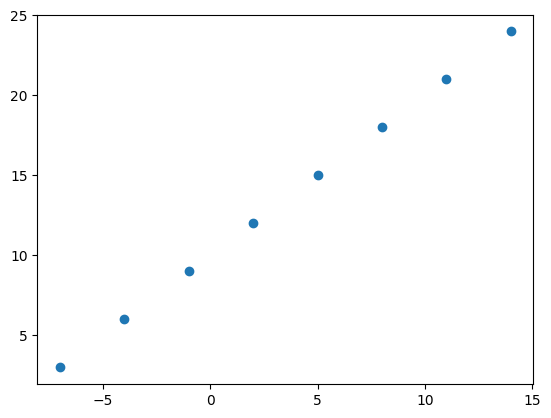

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

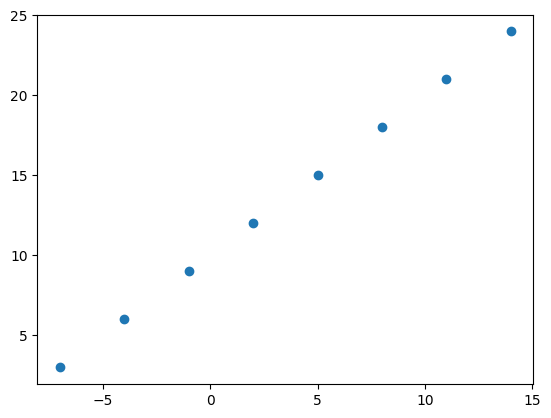

In [ ]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the
function which tells our model how wrong it is) and the optimizer
(tells our model how to improve the patterns its learning) and
evaluation metrics (what we can use ta interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between X & y (features and labels).

In [ ]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

In [ ]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 524ms/step - loss: 13.4249 - mae: 13.4249
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 13.3885 - mae: 13.3885
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 13.3515 - mae: 13.3515
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 13.3140 - mae: 13.3140
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 13.2757 - mae: 13.2757


In [ ]:
# Check out X, and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 94ms/step


array([[1.0472573]], dtype=float32)

In [ ]:
y_pred + 18

array([[19.047256]], dtype=float32)

## Improving our model

We can improve our model, by astering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 328ms/step - loss: 10.1475 - mae: 10.1475
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0150 - mae: 10.0150
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 9.8825 - mae: 9.8825
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7500 - mae: 9.7500
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.6175 - mae: 9.6175
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4850 - mae: 9.4850
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3525 - mae: 9.3525
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 9.2200 - mae: 9.2200
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.0875 - mae: 9.0875
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9550 - mae: 8.9550
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - l

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 94ms/step


array([[30.178633]], dtype=float32)

### Create a new model

In [ ]:
# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 551ms/step - loss: 14.1896 - mae: 14.1896
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.6915 - mae: 13.6915
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2457 - mae: 13.2457
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8561 - mae: 12.8561
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4574 - mae: 12.4574
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.0288 - mae: 12.0288
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5247 - mae: 11.5247
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9419 - mae: 10.9419
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2273 - mae: 10.2273
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 9.3076 - mae: 9.3076
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 88ms/step


array([[32.706882]], dtype=float32)

In [ ]:
# Let's see if we can make another to improve our model

# Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 547ms/step - loss: 13.5968 - mae: 13.5968
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5166 - mae: 13.5166
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.4363 - mae: 13.4363
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.3561 - mae: 13.3561
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.2758 - mae: 13.2758
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 13.1955 - mae: 13.1955
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1152 - mae: 13.1152
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0348 - mae: 13.0348
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9544 - mae: 12.9544
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 12.8739 - mae: 12.8739
Epoch 11/100
1/1 [==============================] -

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[31.703798]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

# When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100.0, 100.0, 4)
X

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
         80.,   84.,   88.,   92.,   96.], dtype=float32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
       -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
        -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
        42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
        86.,  90.,  94.,  98., 102., 106.], dtype=float32)>

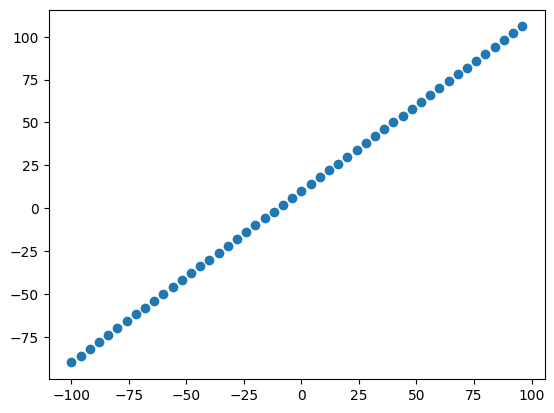

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which typically
constitutes 70-80% of the total available data.
* **Validation set** - the model is fine-tuned on this data, typically representing 10-15% of the available data.
* **Test set** - the model is evaluated on this data to assess what it has learned; this set typically accounts for 10-15% of the total available data.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

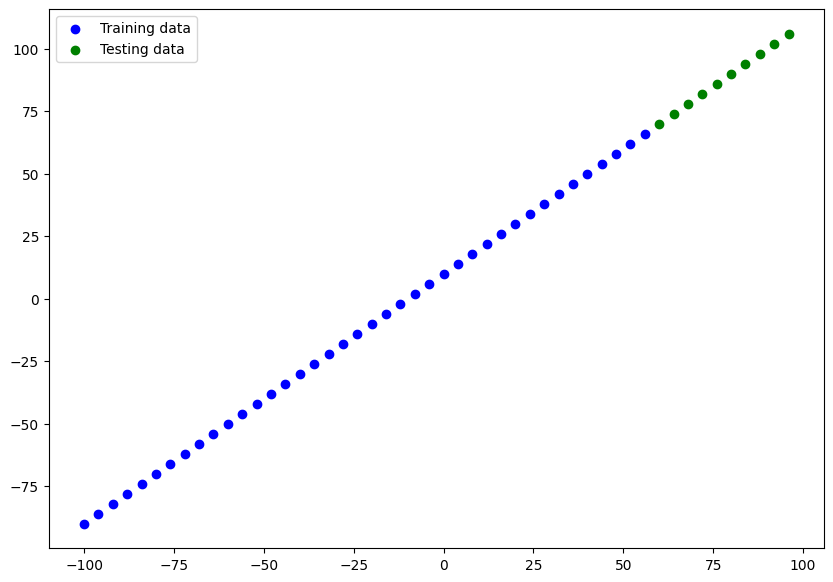

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # Fit
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer1"),
    tf.keras.layers.Dense(10, name="input_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

* Total params - total number of parameters in the model.
* Trainable parameters -these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).



In [ ]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Dense)        (None, 10)                20        
                                                                 
 input_layer2 (Dense)        (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


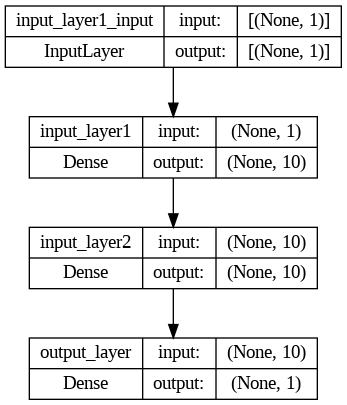

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualize our model's predictions
To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true`
versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 58ms/step


array([[114.941895],
       [122.486534],
       [130.03116 ],
       [137.57582 ],
       [145.12047 ],
       [152.66508 ],
       [160.20975 ],
       [167.75438 ],
       [175.29903 ],
       [182.84367 ]], dtype=float32)

In [72]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [39]:
 # Let's create a plotting function
def plot_predictions(training_data=X_train,
                      training_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_pred):
   """
   Plots training data, test data and compares predictions to ground truth labels.
   """

   plt.figure(figsize=(10, 7))
   # Plot training data in blue
   plt.scatter(training_data, training_labels, c='b', label="Training data")
   # Plot testing data in green
   plt.scatter(test_data,test_labels, c='g', label="Testing data")
   #Plot model's predictions in red
   plt.scatter(test_data, predictions, c='r', label="Predictions")
   # Show the legend
   plt.legend();

In [62]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [104]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(17, name="input_layer0"),
    tf.keras.layers.Dense(15, name="input_layer1"),
    tf.keras.layers.Dense(13, name="input_layer2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# Compile
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["mae"])

# fit
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=190, verbose=1)

Epoch 1/190
2/2 [==============================] - 1s 11ms/step - loss: 83.0928 - mae: 83.0928
Epoch 2/190
2/2 [==============================] - 0s 7ms/step - loss: 78.2163 - mae: 78.2163
Epoch 3/190
2/2 [==============================] - 0s 7ms/step - loss: 73.9201 - mae: 73.9201
Epoch 4/190
2/2 [==============================] - 0s 7ms/step - loss: 69.2611 - mae: 69.2611
Epoch 5/190
2/2 [==============================] - 0s 7ms/step - loss: 64.6226 - mae: 64.6226
Epoch 6/190
2/2 [==============================] - 0s 7ms/step - loss: 60.0921 - mae: 60.0921
Epoch 7/190
2/2 [==============================] - 0s 7ms/step - loss: 55.3298 - mae: 55.3298
Epoch 8/190
2/2 [==============================] - 0s 7ms/step - loss: 50.6845 - mae: 50.6845
Epoch 9/190
2/2 [==============================] - 0s 7ms/step - loss: 46.2866 - mae: 46.2866
Epoch 10/190
2/2 [==============================] - 0s 7ms/step - loss: 41.3484 - mae: 41.3484
Epoch 11/190
2/2 [==============================] - 0s 6ms

In [105]:
# Make some predictions
y_pred = model2.predict(X_test)
y_pred

1/1 [==============================] - 0s 86ms/step


array([[ 70.34007 ],
       [ 74.362305],
       [ 78.38454 ],
       [ 82.40676 ],
       [ 86.42896 ],
       [ 90.45118 ],
       [ 94.47343 ],
       [ 98.49565 ],
       [102.51789 ],
       [106.540085]], dtype=float32)

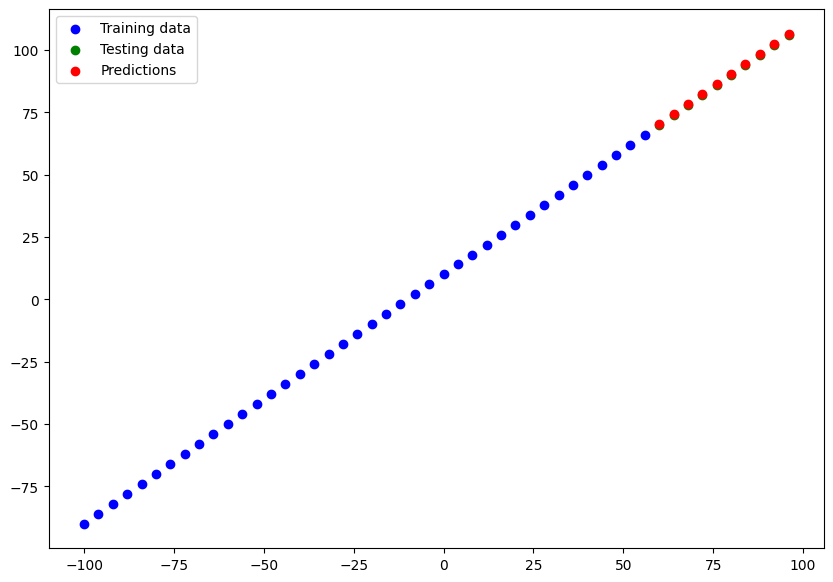

In [106]:
plot_predictions(training_data=X_train,
                 training_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors."

In [108]:
# Evaluate the model on the test
model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 156ms/step - loss: 0.4401 - mae: 0.4401


[0.44008177518844604, 0.44008177518844604]

In [119]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                              y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.727942, 14.582617, 12.246185, 10.718648, 10.      , 10.090236,
       10.98937 , 12.697391, 15.214313, 18.540085], dtype=float32)>

In [120]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.34007 ],
       [ 74.362305],
       [ 78.38454 ],
       [ 82.40676 ],
       [ 86.42896 ],
       [ 90.45118 ],
       [ 94.47343 ],
       [ 98.49565 ],
       [102.51789 ],
       [106.540085]], dtype=float32)>

In [121]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [123]:
# Let's get rid of that one dimension (10, 1) --> (10,)
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.34007 ,  74.362305,  78.38454 ,  82.40676 ,  86.42896 ,
        90.45118 ,  94.47343 ,  98.49565 , 102.51789 , 106.540085],
      dtype=float32)>

In [125]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.44008714>

In [126]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.19775149>

In [129]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=y_pred)

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=y_pred)